In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
df=pd.read_csv('DATA - 3.csv')
df.head()


,participantID,age,nativeLanguage,gender,education,city,country,responseID,section,cue,R1,R2,R3
0,12,28,URU_R,Fe,4,Montevideo,Uruguay,128,set_2013,bar,abierto,cerveza,noche
1,12,28,URU_R,Fe,4,Montevideo,Uruguay,129,set_2013,tren,expreso,nocturno,bala
2,12,28,URU_R,Fe,4,Montevideo,Uruguay,130,set_2013,mano,libre,derecha,hermano
3,12,28,URU_R,Fe,4,Montevideo,Uruguay,131,set_2013,sopa,fría,Mafalda,verde
4,12,28,URU_R,Fe,4,Montevideo,Uruguay,132,set_2013,especie,ave,Darwin,extinción


In [95]:
df.shape

(558503, 13)

In [96]:
df.duplicated().sum()    #checking the duplicates value

0

In [97]:
df.isnull().sum()       ##checking the null value

participantID          0
age                    0
nativeLanguage     22589
gender                 0
education              0
city              151631
country             2538
responseID             0
section                0
cue                    0
R1                    63
R2                    58
R3                    76
dtype: int64

In [98]:
# handling null values
df['nativeLanguage']=df['nativeLanguage'].fillna("Not Available")
df['city']=df['city'].fillna("Not Available")
df['country']=df['country'].fillna("Not Available")
df['R1']=df['R1'].fillna("Not Available")
df['R2']=df['R2'].fillna("Not Available")
df['R3']=df['R3'].fillna("Not Available")

In [99]:
df.isnull().sum()

participantID     0
age               0
nativeLanguage    0
gender            0
education         0
city              0
country           0
responseID        0
section           0
cue               0
R1                0
R2                0
R3                0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558503 entries, 0 to 558502
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   participantID   558503 non-null  int64 
 1   age             558503 non-null  int64 
 2   nativeLanguage  558503 non-null  object
 3   gender          558503 non-null  object
 4   education       558503 non-null  int64 
 5   city            558503 non-null  object
 6   country         558503 non-null  object
 7   responseID      558503 non-null  int64 
 8   section         558503 non-null  object
 9   cue             558503 non-null  object
 10  R1              558503 non-null  object
 11  R2              558503 non-null  object
 12  R3              558503 non-null  object
dtypes: int64(4), object(9)
memory usage: 55.4+ MB


In [101]:
df.describe()

,participantID,age,education,responseID
count,558503.000000,558503.000000,558503.000000,558503.000000
mean,21075.098390,37.796812,3.651834,280727.388893
std,12283.948985,15.118828,0.675921,161398.704512
min,12.000000,5.000000,1.000000,128.000000
25%,10513.000000,25.000000,3.000000,141213.500000
50%,20880.000000,35.000000,4.000000,280839.000000
75%,31387.000000,49.000000,4.000000,420464.500000
max,43297.000000,99.000000,5.000000,560428.000000


Linear Regression

In [113]:
from sklearn import linear_model

In [121]:
x=df[['age','responseID']]
y=df[['education']]

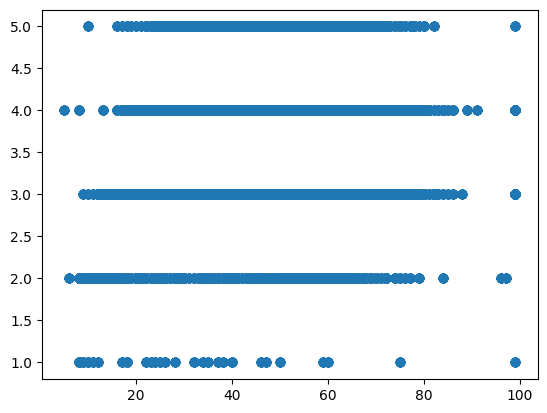

In [122]:
plt.scatter(df['age'],df['education'])

In [123]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [124]:
print(reg.coef_)
print(reg.intercept_)

[[ 7.20117599e-03 -9.67443928e-07]]
[3.65124007]


In [125]:
reg.predict([[28,128]])     #its real answer is 4 so we can say our model is predicting nearby correct

c:\Users\RAWAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.85274917]])

we will perform test train split method

In [102]:
X=df[['participantID','age','education']]
Y=df[['section']]

In [103]:
X

,participantID,age,education
0,12,28,4
1,12,28,4
2,12,28,4
3,12,28,4
4,12,28,4
...,...,...,...
558498,43296,33,3
558499,43297,60,4
558500,43297,60,4
558501,43297,60,4


In [104]:
Y

,section
0,set_2013
1,set_2013
2,set_2013
3,set_2013
4,set_2013
...,...
558498,set_2024
558499,set_2024
558500,set_2024
558501,set_2024


In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [106]:
print((X_train.shape))
print((X_test.shape))

(418877, 3)
(139626, 3)


In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [108]:
knn.fit(X_train,y_train)     #training our dataset

c:\Users\RAWAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [109]:
check=np.array([[13,25,1]])
check.shape

(1, 3)

In [110]:
test_predit=knn.predict(check)
print("His test section is: ",test_predit)      #predicting correct

His test section is:  ['set_2013']


c:\Users\RAWAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [111]:
y_pred=knn.predict(X_test)         #check prediction for test data
print("test set predictions: ",y_pred)

test set predictions:  ['set_2019' 'set_2023' 'set_2023' ... 'set_2013' 'set_2014' 'set_2020']


In [112]:
#checking accuracy of our model
knn.score(X_test,y_test)

1.0

Hypothesis Testing

Ttest for hypothesis testing of age and education level

In [127]:
import numpy as np
from scipy import stats

data1 = df[['age']]
data2 = df[['education']]

# Performing a two-sample t-test
t_statistic, p_value = stats.ttest_ind(data1, data2)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Determine if the difference is statistically significant
alpha = 0.05  # desired significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-statistic: [1686.11765478]
P-value: [0.]
Reject the null hypothesis: There is a significant difference.


Chi-square test of 'participantID','age','education'.

In [133]:
from scipy.stats import chi2_contingency

# Creating a contingency table 
observed = df[['participantID','age','education',]]

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Determine if the difference is statistically significant
alpha = 0.05  # Our desired significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between variables.")


Chi-square statistic: 49896533.47729165
P-value: 0.0
Degrees of freedom: 1117004
Expected frequencies table:
[[4.39136345e+01 7.87562348e-02 7.60923064e-03]
 [4.39136345e+01 7.87562348e-02 7.60923064e-03]
 [4.39136345e+01 7.87562348e-02 7.60923064e-03]
 ...
 [4.32758888e+04 7.76124795e+01 7.49872386e+00]
 [4.32758888e+04 7.76124795e+01 7.49872386e+00]
 [4.32758888e+04 7.76124795e+01 7.49872386e+00]]
Reject the null hypothesis: There is a significant relationship between variables.


Performing ANOVA test with 'participantID','age','education' and responseID

In [134]:
import scipy.stats as stats
group1 = df[['participantID']]
group2 = df[['age']]
group3 = df[['education']]
group4 = df[['responseID']]

#Using the f_oneway function from scipy.stats to perform the ANOVA test.
f_statistic, p_value = stats.f_oneway(group1, group2, group3,group4)

#print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# making decision by Determining if there are statistically significant differences among the groups by comparing the p-value to a chosen significance level (alpha).

alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences among the groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences among the groups.")



F-statistic: [1605124.68289494]
P-value: [0.]
Reject the null hypothesis: There are significant differences among the groups.
